### Name :-  A.M.A.D.ADIKARI
### Index No :-   190021A

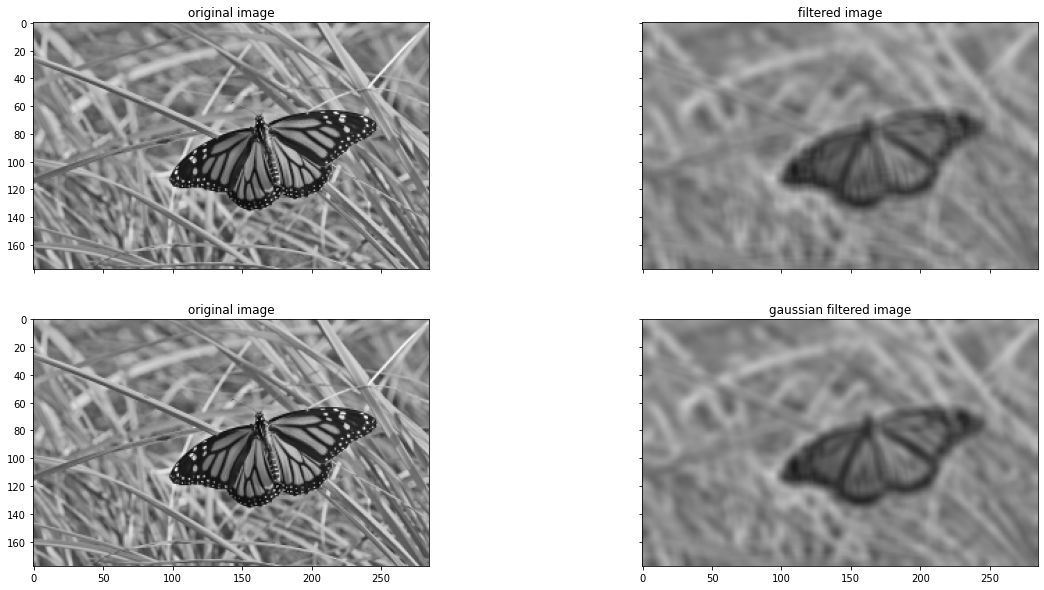

In [125]:
# Question 01
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_4)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


kernel = np.ones((9, 9), dtype = np.float32)/81
filtered_img = cv.filter2D(img, -1, kernel)
gaussian_filtered_img = cv.GaussianBlur(img, (9, 9), 4)

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all', figsize = (20, 10))
ax[0][0].imshow(img)
ax[0][0].set_title("original image")
ax[0][1].imshow(filtered_img)
ax[0][1].set_title("filtered image")

ax[1][0].imshow(img)
ax[1][0].set_title("original image")

ax[1][1].imshow(gaussian_filtered_img)
ax[1][1].set_title("gaussian filtered image")
plt.show()

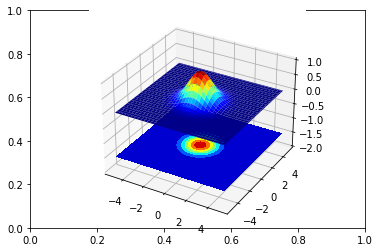

In [126]:
# Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')

step = 0.1
sigma = 1
x = np.arange(-5, 5 + step, step)
y = np.arange(-5, 5 + step, step)
xx, yy = np.meshgrid(x, y)
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))

surf = ax.plot_surface(xx, yy, g, cmap = cm.jet)
cset = ax.contourf(xx, yy, g, zdir = 'z', offset=np.min(g)-1.5, cmap=cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))

#plt.axis('off')
plt.show()


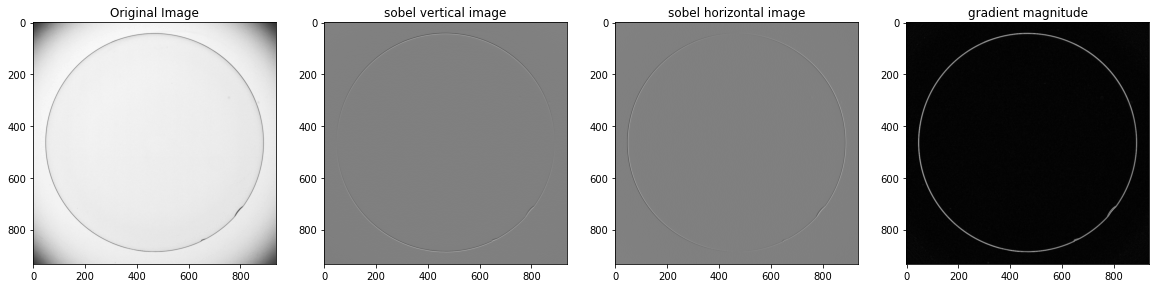

In [127]:
# Question 03
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("contact_lens.tif", cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]] , dtype = 'float')
sobel_v_img = cv.filter2D(img, -1, sobel_v_kernel)

sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] , dtype = 'float')
sobel_h_img = cv.filter2D(img, -1, sobel_h_kernel)

grad_mag_img = (sobel_v_img**2 + sobel_h_img**2)**0.5

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(sobel_v_img, cmap = 'gray', vmin=-1020, vmax=1020)
ax[1].set_title('sobel vertical image')
ax[2].imshow(sobel_h_img, cmap = 'gray', vmin=-1020, vmax=1020)
ax[2].set_title('sobel horizontal image')
ax[3].imshow(grad_mag_img, cmap='gray')
ax[3].set_title('gradient magnitude')
plt.show()

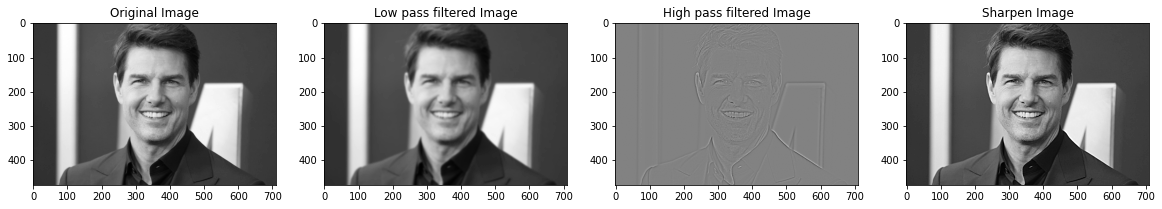

In [128]:
# Question 04
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("tom.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma = 2
k_size = 15
kernal = cv.getGaussianKernel(k_size, sigma)
f_lp = cv.sepFilter2D(img, -1, kernal, kernal)
f_hp = img - f_lp
f_sharpen = cv.addWeighted(img, 1, f_hp, 1, 0)

fig, ax = plt.subplots(1, 4, figsize = (20, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(f_lp, cmap='gray')
ax[1].set_title('Low pass filtered Image')
ax[2].imshow(f_hp, cmap='gray')
ax[2].set_title('High pass filtered Image')
ax[3].imshow(f_sharpen, cmap='gray', vmin = 0, vmax = 255)
ax[3].set_title('Sharpen Image')
plt.show()
